In [489]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

In [490]:
day_df = pd.read_csv('day.csv')

In [491]:
day_df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [492]:
day_df.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [493]:
day_df.shape

(730, 16)

In [494]:
#Checking if data has any nulls
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [495]:
#Dropping some of the columns
# Dropping datetime column
day_df.drop('dteday',axis=1,inplace=True) 
# Dropping instant column uniquw value per Row
day_df.drop('instant',axis=1,inplace=True) 
#Dropping Causal & registered as they act a target variable and we can have only work with one target variable
#day_df.drop('casual',axis=1) 
#day_df.drop('registered',axis=1) 

## EDA - Visualization

#### Numerical variable

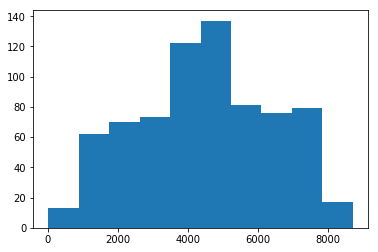

In [496]:
#EDA to understand some of the variables
#1. Count variable
plt.hist(day_df['cnt'])
plt.show()

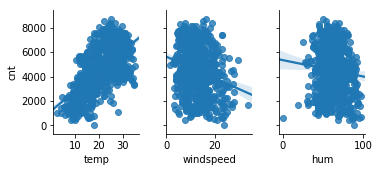

In [497]:
#Let's see the distribution visually
sns.pairplot(day_df, x_vars= ['temp', 'windspeed', 'hum'], y_vars= 'cnt', aspect=0.7, kind= 'reg')
plt.show()

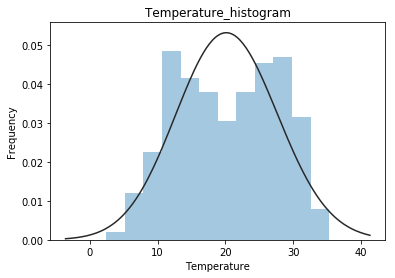

In [498]:
#Let's take a look at their distributions individually and check if they are normally distributed
#Checking for normality of num features
temp= day_df[['temp']]
sns.distplot(temp, kde=False, fit=stats.gamma)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title("Temperature_histogram")
plt.show()

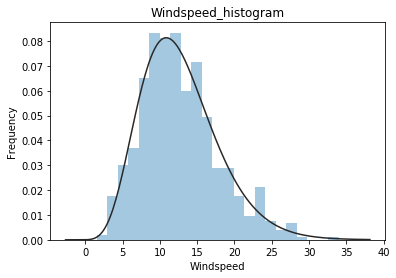

In [499]:
windspeed= day_df[['windspeed']]
sns.distplot(windspeed, kde=False, fit=stats.gamma)
plt.xlabel('Windspeed')
plt.ylabel('Frequency')
plt.title("Windspeed_histogram")
plt.show()

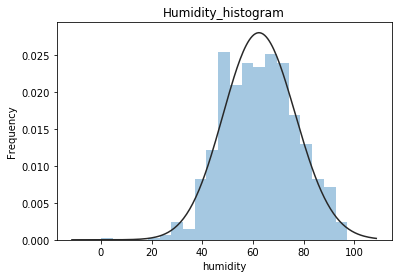

In [500]:
humidity= day_df[['hum']]
sns.distplot(humidity, kde=False, fit=stats.gamma)
plt.xlabel('humidity')
plt.ylabel('Frequency')
plt.title("Humidity_histogram")
plt.show()

### Categorical Variables

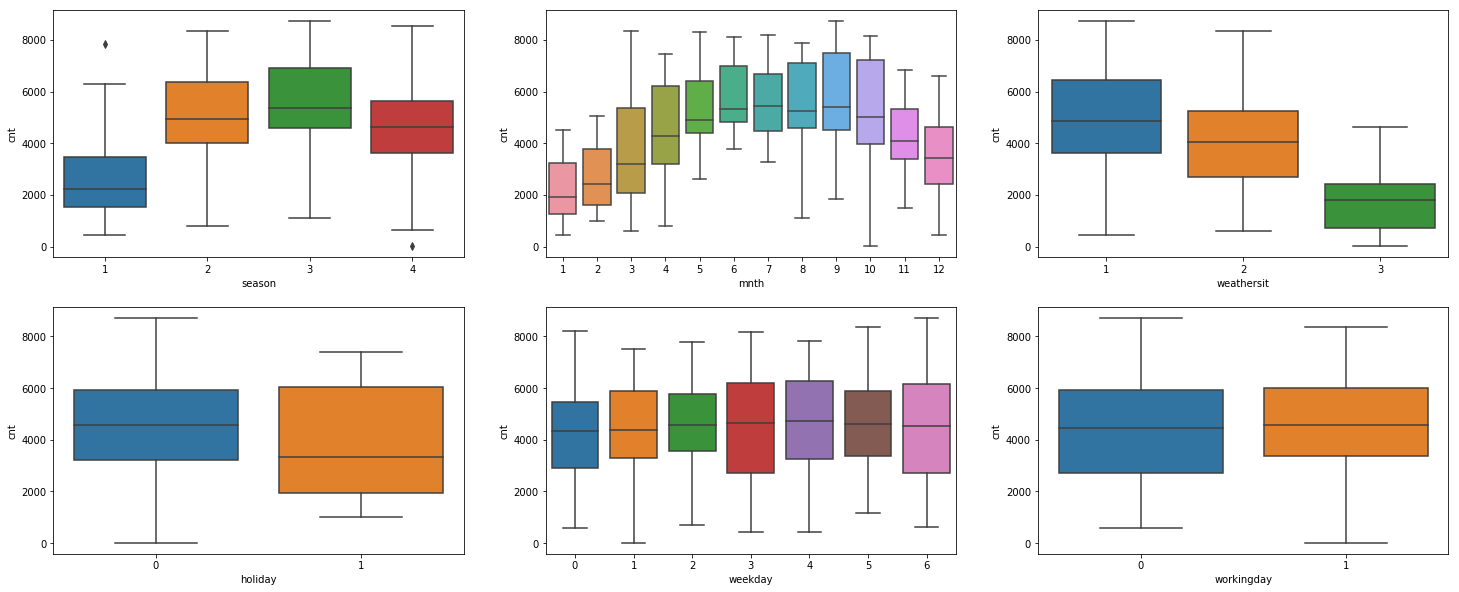

In [501]:
plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = day_df)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = day_df)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = day_df)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = day_df)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = day_df)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = day_df)
plt.show()

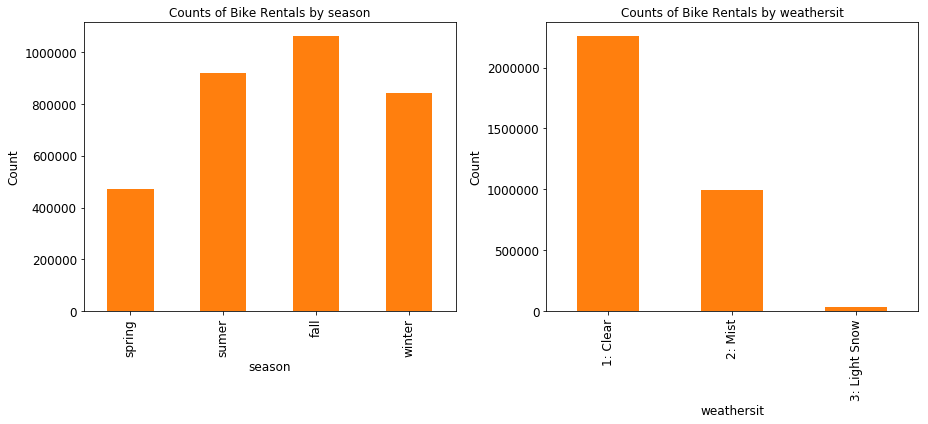

In [502]:
f,  (ax1, ax2)  =  plt.subplots(nrows=1, ncols=2, figsize=(13, 6))

ax1 = day_df[['season','cnt']].groupby(['season']).sum().reset_index().plot(kind='bar',
                                       legend = False, title ="Counts of Bike Rentals by season", 
                                         stacked=True, fontsize=12, ax=ax1)
ax1.set_xlabel("season", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)
ax1.set_xticklabels(['spring','sumer','fall','winter'])

 
ax2 = day_df[['weathersit','cnt']].groupby(['weathersit']).sum().reset_index().plot(kind='bar',  
      legend = False, stacked=True, title ="Counts of Bike Rentals by weathersit", fontsize=12, ax=ax2)

ax2.set_xlabel("weathersit", fontsize=12)
ax2.set_ylabel("Count", fontsize=12)
ax2.set_xticklabels(['1: Clear','2: Mist','3: Light Snow','4: Heavy Rain'])

f.tight_layout()
plt.show()

The above graph of 'weathersit' shows that people tends to rent more bike in clear weather and 'season' show the fall is the top season to rent bike.

### Co-relation Matrix

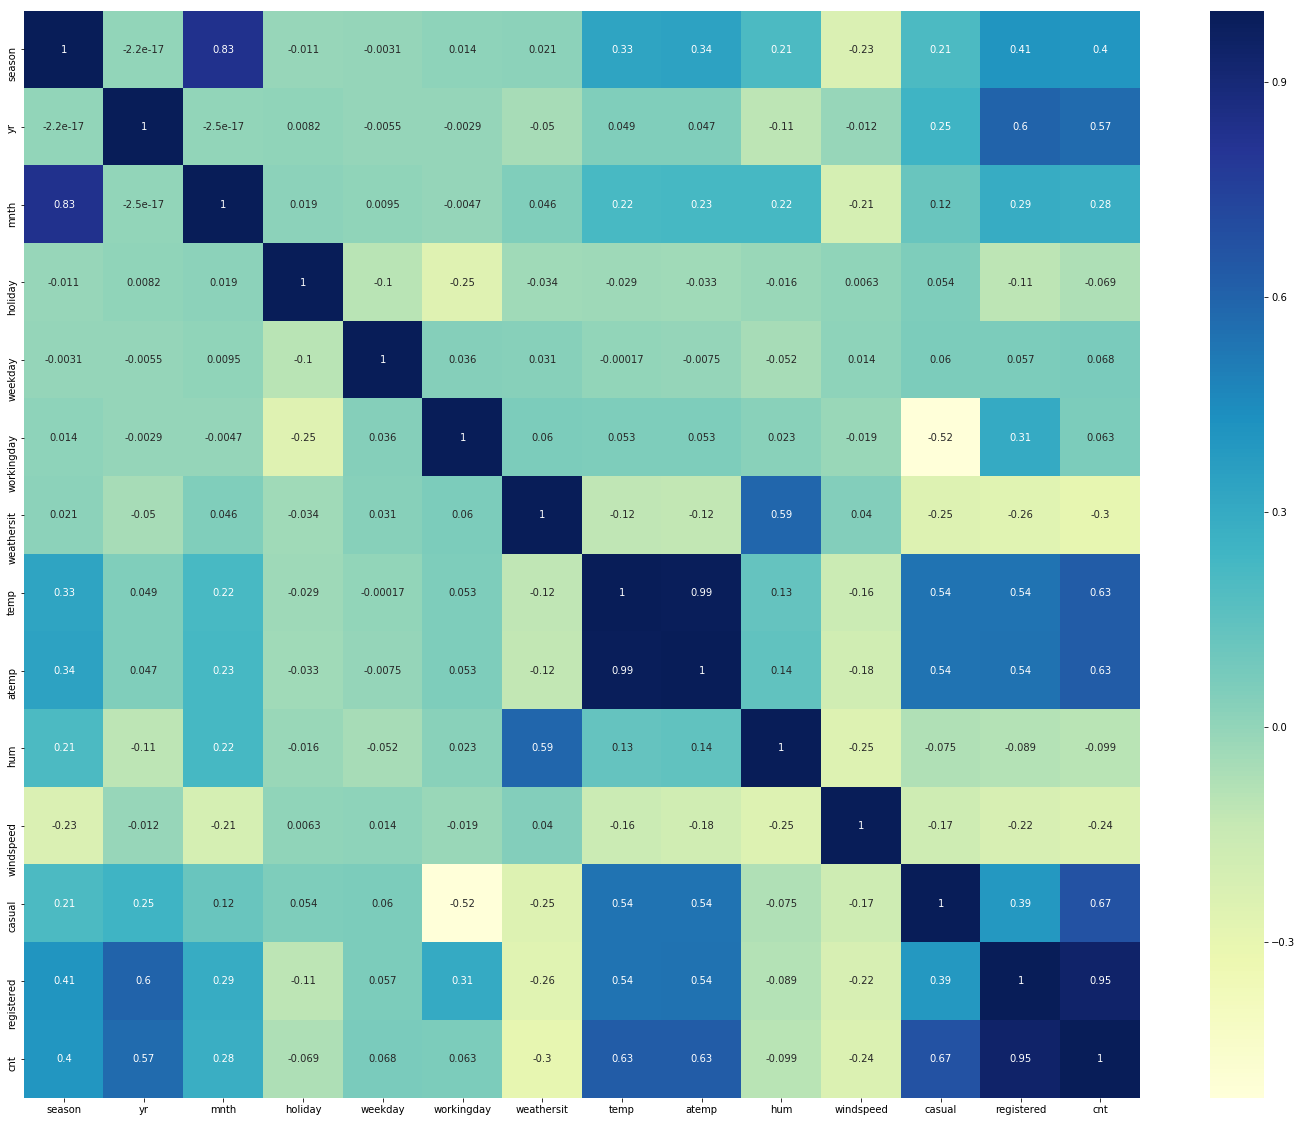

In [503]:
plt.figure(figsize = (25,20))
sns.heatmap(day_df.corr(), annot = True, cmap="YlGnBu")
plt.show()

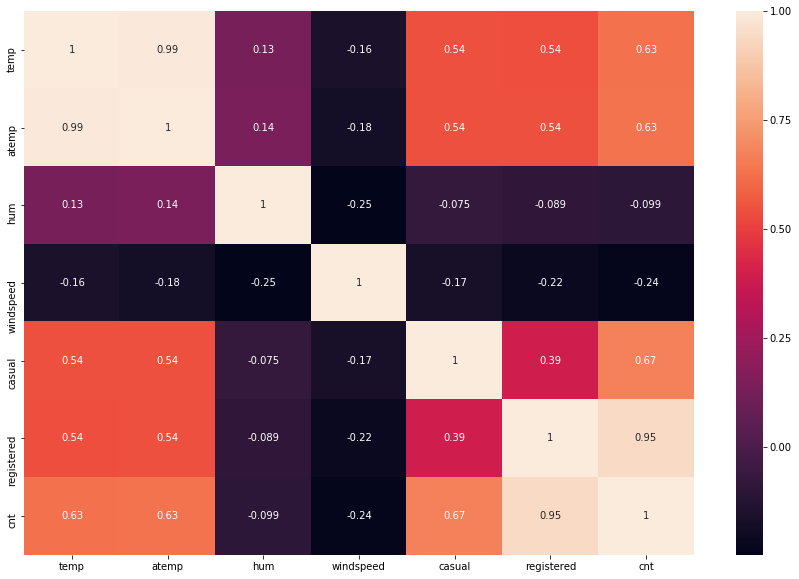

In [504]:
#Let's see how other numerical variables are related to the count variable
num_features= day_df[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']]
plt.figure(figsize=(15,10))
correlation= num_features.corr()
sns.heatmap(correlation, annot= True)
plt.show();

Casual and Registred users do appear to have high correlation to the dependent 'count' variable but that is because count is a summation of both these categories. So, we will ignore this relationship. Another thing to note here is the high correlation between 'temp' and 'atemp' which can introduce multicollinearity in the model. Therefore, we will only consider one varible 'temp' in the model.

### Data Preperation

In [506]:
#Dropping the columns from the model
day_df.drop('atemp', axis = 1, inplace=True)
day_df.drop('casual',axis=1, inplace=True) 
day_df.drop('registered',axis=1, inplace=True) 
day_df.head()

ValueError: labels ['atemp'] not contained in axis

### Replace the column values with respective values

In [507]:
day_df['season']= day_df.season.map({1: "spring", 2 : "summer", 3 : "fall", 4 :"winter" })
day_df['weathersit']= day_df.weathersit.map({1: "Clear + cloudy",\
                                        2 : "Mist + Cloudy", \
                                        3 : "Light Snow and Rain", \
                                        4 :"Heavy Snow and Rain " })
day_df['weekday']= day_df.weekday.map({1: "Monday",2:"Tuesday" ,3:"Wednesday",4 :"Thursday",5:"Friday",6:"Saturday",0:"Sunday"})
day_df['mnth']= day_df.mnth.map({1: "January",2:"February" ,3:"March",4 :"April",5:"May",6:"June",7:"July",8:"August",9:"September",10:"October",11:"November",12:"December"})
day_df.head()

season  yr     mnth  holiday    weekday  workingday      weathersit  \
0  spring   0  January        0   Saturday           0   Mist + Cloudy   
1  spring   0  January        0     Sunday           0   Mist + Cloudy   
2  spring   0  January        0     Monday           1  Clear + cloudy   
3  spring   0  January        0    Tuesday           1  Clear + cloudy   
4  spring   0  January        0  Wednesday           1  Clear + cloudy   

        temp      hum  windspeed   cnt  
0  14.110847  80.5833  10.749882   985  
1  14.902598  69.6087  16.652113   801  
2   8.050924  43.7273  16.636703  1349  
3   8.200000  59.0435  10.739832  1562  
4   9.305237  43.6957  12.522300  1600

### Dummy Variables

In [508]:
#Checking the data type before converstion
# Check the datatypes before convertion
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
season        730 non-null object
yr            730 non-null int64
mnth          730 non-null object
holiday       730 non-null int64
weekday       730 non-null object
workingday    730 non-null int64
weathersit    730 non-null object
temp          730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
dtypes: float64(3), int64(4), object(4)
memory usage: 62.8+ KB


In [509]:
# Convert to 'category' data type

day_df['season']=day_df['season'].astype('category')
day_df['weathersit']=day_df['weathersit'].astype('category')
day_df['mnth']=day_df['mnth'].astype('category')
day_df['weekday']=day_df['weekday'].astype('category')
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
season        730 non-null category
yr            730 non-null int64
mnth          730 non-null category
holiday       730 non-null int64
weekday       730 non-null category
workingday    730 non-null int64
weathersit    730 non-null category
temp          730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
dtypes: category(4), float64(3), int64(4)
memory usage: 43.9 KB


In [510]:
#This code does 3 things:
# 1) Create Dummy variable
# 2) Drop original variable for which the dummy was created
# 3) Drop first dummy variable for each set of dummies created.

day_df = pd.get_dummies(day_df, drop_first=True)


# We will visualise the changes after the dummy creation.

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
yr                                730 non-null int64
holiday                           730 non-null int64
workingday                        730 non-null int64
temp                              730 non-null float64
hum                               730 non-null float64
windspeed                         730 non-null float64
cnt                               730 non-null int64
season_spring                     730 non-null uint8
season_summer                     730 non-null uint8
season_winter                     730 non-null uint8
mnth_August                       730 non-null uint8
mnth_December                     730 non-null uint8
mnth_February                     730 non-null uint8
mnth_January                      730 non-null uint8
mnth_July                         730 non-null uint8
mnth_June                         730 non-null uint8
mnth_March                        730 non

In [511]:
day_df.shape

(730, 29)

### Splitting the Data

In [379]:
# Check the shape before spliting
day_df.shape

(730, 29)

In [512]:
# Check the info before spliting

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
yr                                730 non-null int64
holiday                           730 non-null int64
workingday                        730 non-null int64
temp                              730 non-null float64
hum                               730 non-null float64
windspeed                         730 non-null float64
cnt                               730 non-null int64
season_spring                     730 non-null uint8
season_summer                     730 non-null uint8
season_winter                     730 non-null uint8
mnth_August                       730 non-null uint8
mnth_December                     730 non-null uint8
mnth_February                     730 non-null uint8
mnth_January                      730 non-null uint8
mnth_July                         730 non-null uint8
mnth_June                         730 non-null uint8
mnth_March                        730 non

In [513]:
# We specify 'random_state' so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(day_df, train_size = 0.70, test_size = 0.30, random_state = 333)

In [382]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 483 to 366
Data columns (total 29 columns):
yr                                510 non-null int64
holiday                           510 non-null int64
workingday                        510 non-null int64
temp                              510 non-null float64
hum                               510 non-null float64
windspeed                         510 non-null float64
cnt                               510 non-null int64
season_spring                     510 non-null uint8
season_summer                     510 non-null uint8
season_winter                     510 non-null uint8
mnth_August                       510 non-null uint8
mnth_December                     510 non-null uint8
mnth_February                     510 non-null uint8
mnth_January                      510 non-null uint8
mnth_July                         510 non-null uint8
mnth_June                         510 non-null uint8
mnth_March                        510 n

In [514]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 483 to 366
Data columns (total 29 columns):
yr                                510 non-null int64
holiday                           510 non-null int64
workingday                        510 non-null int64
temp                              510 non-null float64
hum                               510 non-null float64
windspeed                         510 non-null float64
cnt                               510 non-null int64
season_spring                     510 non-null uint8
season_summer                     510 non-null uint8
season_winter                     510 non-null uint8
mnth_August                       510 non-null uint8
mnth_December                     510 non-null uint8
mnth_February                     510 non-null uint8
mnth_January                      510 non-null uint8
mnth_July                         510 non-null uint8
mnth_June                         510 non-null uint8
mnth_March                        510 n

In [515]:
df_test.shape

(219, 29)

In [516]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 29 columns):
yr                                219 non-null int64
holiday                           219 non-null int64
workingday                        219 non-null int64
temp                              219 non-null float64
hum                               219 non-null float64
windspeed                         219 non-null float64
cnt                               219 non-null int64
season_spring                     219 non-null uint8
season_summer                     219 non-null uint8
season_winter                     219 non-null uint8
mnth_August                       219 non-null uint8
mnth_December                     219 non-null uint8
mnth_February                     219 non-null uint8
mnth_January                      219 non-null uint8
mnth_July                         219 non-null uint8
mnth_June                         219 non-null uint8
mnth_March                        219 no

### Scaling

In [517]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [518]:
# Checking the values before scaling
df_train.head()

yr  holiday  workingday       temp      hum  windspeed   cnt  \
483   1        0           0  18.791653  58.7083   7.832836  6304   
650   1        0           0  16.126653  49.4583   9.791514  7109   
212   0        0           1  31.638347  55.0833  10.500039  4266   
714   1        0           0  14.862500  83.8750   6.749714  3786   
8     0        0           0   5.671653  43.4167  24.250650   822   

     season_spring  season_summer  season_winter            ...             \
483              0              1              0            ...              
650              0              0              1            ...              
212              0              0              0            ...              
714              0              0              1            ...              
8                1              0              0            ...              

     mnth_October  mnth_September  weekday_Monday  weekday_Saturday  \
483             0               0               0                 0   
650             1               0               0                 1   
212             0               0               1                 0   
714             0               0               0                 0   
8               0               0               0                 0   

     weekday_Sunday  weekday_Thursday  weekday_Tuesday  weekday_Wednesday  \
483               1                 0                0                  0   
650               0                 0                0                  0   
212               0                 0                0                  0   
714               1                 0                0                  0   
8                 1                 0                0                  0   

     weathersit_Light Snow and Rain  weathersit_Mist + Cloudy  
483                               0                         0  
650                               0                         0  
212                               0                         0  
714                               0                         1  
8                                 0                         0  

[5 rows x 29 columns]

In [519]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'mnth_August',
       'mnth_December', 'mnth_February', 'mnth_January', 'mnth_July',
       'mnth_June', 'mnth_March', 'mnth_May', 'mnth_November', 'mnth_October',
       'mnth_September', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday', 'weathersit_Light Snow and Rain',
       'weathersit_Mist + Cloudy'],
      dtype='object')

In [520]:
# Apply scaler() to all the numeric variables

num_vars = ['temp', 'hum', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [521]:
# Checking values after scaling
df_train.head()

yr  holiday  workingday      temp       hum  windspeed       cnt  \
483   1        0           0  0.497426  0.609956   0.194850  0.722734   
650   1        0           0  0.416433  0.513852   0.255118  0.815347   
212   0        0           1  0.887856  0.572294   0.276919  0.488265   
714   1        0           0  0.378013  0.871429   0.161523  0.433042   
8     0        0           0  0.098690  0.451083   0.700017  0.092039   

     season_spring  season_summer  season_winter            ...             \
483              0              1              0            ...              
650              0              0              1            ...              
212              0              0              0            ...              
714              0              0              1            ...              
8                1              0              0            ...              

     mnth_October  mnth_September  weekday_Monday  weekday_Saturday  \
483             0               0               0                 0   
650             1               0               0                 1   
212             0               0               1                 0   
714             0               0               0                 0   
8               0               0               0                 0   

     weekday_Sunday  weekday_Thursday  weekday_Tuesday  weekday_Wednesday  \
483               1                 0                0                  0   
650               0                 0                0                  0   
212               0                 0                0                  0   
714               1                 0                0                  0   
8                 1                 0                0                  0   

     weathersit_Light Snow and Rain  weathersit_Mist + Cloudy  
483                               0                         0  
650                               0                         0  
212                               0                         0  
714                               0                         1  
8                                 0                         0  

[5 rows x 29 columns]

In [522]:
df_train.describe()

yr     holiday  workingday        temp         hum   windspeed  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.501961    0.023529    0.682353    0.540901    0.647390    0.346318   
std      0.500487    0.151726    0.466018    0.227898    0.149722    0.160266   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.343228    0.536147    0.230784   
50%      1.000000    0.000000    1.000000    0.540519    0.646367    0.325635   
75%      1.000000    0.000000    1.000000    0.740406    0.757900    0.434287   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              cnt  season_spring  season_summer  season_winter  \
count  510.000000      510.00000     510.000000     510.000000   
mean     0.515144        0.24902       0.247059       0.241176   
std      0.224281        0.43287       0.431725       0.428217   
min      0.000000        0.00000       0.000000       0.000000   
25%      0.359468        0.00000       0.000000       0.000000   
50%      0.516337        0.00000       0.000000       0.000000   
75%      0.685861        0.00000       0.000000       0.000000   
max      1.000000        1.00000       1.000000       1.000000   

                 ...             mnth_October  mnth_September  weekday_Monday  \
count            ...               510.000000      510.000000      510.000000   
mean             ...                 0.084314        0.082353        0.139216   
std              ...                 0.278131        0.275172        0.346511   
min              ...                 0.000000        0.000000        0.000000   
25%              ...                 0.000000        0.000000        0.000000   
50%              ...                 0.000000        0.000000        0.000000   
75%              ...                 0.000000        0.000000        0.000000   
max              ...                 1.000000        1.000000        1.000000   

       weekday_Saturday  weekday_Sunday  weekday_Thursday  weekday_Tuesday  \
count        510.000000      510.000000        510.000000       510.000000   
mean           0.150980        0.143137          0.129412         0.141176   
std            0.358381        0.350557          0.335985         0.348545   
min            0.000000        0.000000          0.000000         0.000000   
25%            0.000000        0.000000          0.000000         0.000000   
50%            0.000000        0.000000          0.000000         0.000000   
75%            0.000000        0.000000          0.000000         0.000000   
max            1.000000        1.000000          1.000000         1.000000   

       weekday_Wednesday  weathersit_Light Snow and Rain  \
count         510.000000                      510.000000   
mean            0.150980                        0.025490   
std             0.358381                        0.157763   
min             0.000000                        0.000000   
25%             0.000000                        0.000000   
50%             0.000000                        0.000000   
75%             0.000000                        0.000000   
max             1.000000                        1.000000   

       weathersit_Mist + Cloudy  
count                510.000000  
mean                   0.341176  
std                    0.474570  
min                    0.000000  
25%                    0.000000  
50%                    0.000000  
75%                    1.000000  
max                    1.000000  

[8 rows x 29 columns]

### BUILDING A LINEAR MODEL
#### Dividing into X and Y sets for the model building

In [523]:
y_train = df_train.pop('cnt')
X_train = df_train

### RFE

In [524]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [525]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)


In [526]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('yr', True, 1),
 ('holiday', False, 8),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 10),
 ('season_winter', True, 1),
 ('mnth_August', False, 6),
 ('mnth_December', True, 1),
 ('mnth_February', False, 5),
 ('mnth_January', False, 4),
 ('mnth_July', True, 1),
 ('mnth_June', False, 13),
 ('mnth_March', True, 1),
 ('mnth_May', False, 2),
 ('mnth_November', True, 1),
 ('mnth_October', False, 11),
 ('mnth_September', True, 1),
 ('weekday_Monday', False, 3),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', False, 7),
 ('weekday_Thursday', False, 12),
 ('weekday_Tuesday', False, 9),
 ('weekday_Wednesday', False, 14),
 ('weathersit_Light Snow and Rain', True, 1),
 ('weathersit_Mist + Cloudy', True, 1)]

In [527]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_December', 'mnth_July', 'mnth_March',
       'mnth_November', 'mnth_September', 'weekday_Saturday',
       'weathersit_Light Snow and Rain', 'weathersit_Mist + Cloudy'],
      dtype='object')

In [528]:
X_train.columns[~rfe.support_]

Index(['holiday', 'season_summer', 'mnth_August', 'mnth_February',
       'mnth_January', 'mnth_June', 'mnth_May', 'mnth_October',
       'weekday_Monday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday'],
      dtype='object')

In [529]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

### STATS MODEL

#### Model 1 - VIF Check

In [530]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3                              hum  23.20
2                             temp  16.56
4                        windspeed   5.10
1                       workingday   4.80
5                    season_spring   2.77
6                    season_winter   2.73
14        weathersit_Mist + Cloudy   2.26
0                               yr   2.05
10                   mnth_November   1.83
12                weekday_Saturday   1.83
8                        mnth_July   1.42
7                    mnth_December   1.41
9                       mnth_March   1.22
11                  mnth_September   1.22
13  weathersit_Light Snow and Rain   1.21

In [531]:
import statsmodels.api as sm

# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [532]:
lr1.params


const                             0.330915
yr                                0.229108
workingday                        0.038902
temp                              0.450511
hum                              -0.163100
windspeed                        -0.185407
season_spring                    -0.126004
season_winter                     0.080391
mnth_December                    -0.041700
mnth_July                        -0.049495
mnth_March                        0.047863
mnth_November                    -0.060646
mnth_September                    0.059716
weekday_Saturday                  0.054333
weathersit_Light Snow and Rain   -0.268168
weathersit_Mist + Cloudy         -0.049681
dtype: float64

In [533]:
# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     174.1
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          4.19e-186
Time:                        13:33:27   Log-Likelihood:                 508.03
No. Observations:                 510   AIC:                            -984.1
Df Residuals:                     494   BIC:                            -916.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

#### Model 2 - VIF Check
##### Remove hum based on its high VIF value

In [534]:
X_train_new = X_train_rfe.drop(["hum"], axis = 1)

In [535]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2                             temp  7.17
3                        windspeed  5.08
1                       workingday  4.65
5                    season_winter  2.39
4                    season_spring  2.11
0                               yr  2.04
9                    mnth_November  1.81
11                weekday_Saturday  1.78
13        weathersit_Mist + Cloudy  1.55
7                        mnth_July  1.39
6                    mnth_December  1.35
8                       mnth_March  1.22
10                  mnth_September  1.22
12  weathersit_Light Snow and Rain  1.08

In [536]:
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [537]:
lr2.params

const                             0.237767
yr                                0.233284
workingday                        0.040800
temp                              0.421940
windspeed                        -0.151428
season_spring                    -0.127698
season_winter                     0.074839
mnth_December                    -0.050756
mnth_July                        -0.042334
mnth_March                        0.053570
mnth_November                    -0.060491
mnth_September                    0.054755
weekday_Saturday                  0.055458
weathersit_Light Snow and Rain   -0.316687
weathersit_Mist + Cloudy         -0.076763
dtype: float64

In [538]:
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     178.8
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          2.98e-183
Time:                        13:34:33   Log-Likelihood:                 498.50
No. Observations:                 510   AIC:                            -967.0
Df Residuals:                     495   BIC:                            -903.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

#### Model 3 - Removing variable windspeed because of high VIF value

In [539]:
X_train_new = X_train_new.drop(["windspeed"], axis = 1)

In [540]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2                             temp  5.49
1                       workingday  4.58
4                    season_winter  2.38
0                               yr  2.03
8                    mnth_November  1.77
3                    season_spring  1.74
10                weekday_Saturday  1.74
12        weathersit_Mist + Cloudy  1.54
6                        mnth_July  1.37
5                    mnth_December  1.35
7                       mnth_March  1.22
9                   mnth_September  1.21
11  weathersit_Light Snow and Rain  1.06

In [541]:
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [542]:
# Check the parameters obtained

lr3.params

const                             0.171910
yr                                0.230997
workingday                        0.042784
temp                              0.439092
season_spring                    -0.128072
season_winter                     0.087402
mnth_December                    -0.045288
mnth_July                        -0.035632
mnth_March                        0.052988
mnth_November                    -0.066409
mnth_September                    0.061242
weekday_Saturday                  0.054575
weathersit_Light Snow and Rain   -0.332959
weathersit_Mist + Cloudy         -0.074943
dtype: float64

In [543]:
# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     179.0
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          9.71e-178
Time:                        13:35:16   Log-Likelihood:                 482.65
No. Observations:                 510   AIC:                            -937.3
Df Residuals:                     496   BIC:                            -878.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

##### Model 4 - Removing the variable mnth_July based on its high p - value

In [544]:
X_train_new = X_train_new.drop(["mnth_July"], axis = 1)

VIF Check

In [545]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2                             temp  4.53
1                       workingday  4.48
4                    season_winter  2.35
0                               yr  2.03
7                    mnth_November  1.77
3                    season_spring  1.74
9                 weekday_Saturday  1.73
11        weathersit_Mist + Cloudy  1.53
5                    mnth_December  1.35
6                       mnth_March  1.21
8                   mnth_September  1.17
10  weathersit_Light Snow and Rain  1.06

In [546]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [547]:
# Check the parameters obtained

lr4.params

const                             0.180014
yr                                0.231250
workingday                        0.044564
temp                              0.416154
season_spring                    -0.131323
season_winter                     0.088333
mnth_December                    -0.046975
mnth_March                        0.054124
mnth_November                    -0.068551
mnth_September                    0.066699
weekday_Saturday                  0.055447
weathersit_Light Snow and Rain   -0.334394
weathersit_Mist + Cloudy         -0.073675
dtype: float64

In [548]:
# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     192.4
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          4.95e-178
Time:                        13:38:26   Log-Likelihood:                 480.61
No. Observations:                 510   AIC:                            -935.2
Df Residuals:                     497   BIC:                            -880.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

#### Model 5 - Remove mnth_December because of its high p - Value

In [549]:
X_train_new = X_train_new.drop(["mnth_December"], axis = 1)

In [550]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2                             temp  4.50
1                       workingday  4.46
0                               yr  2.02
4                    season_winter  1.97
8                 weekday_Saturday  1.72
3                    season_spring  1.69
6                    mnth_November  1.61
10        weathersit_Mist + Cloudy  1.53
5                       mnth_March  1.20
7                   mnth_September  1.16
9   weathersit_Light Snow and Rain  1.06

In [551]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

In [552]:
# Check the parameters obtained

lr5.params

const                             0.169570
yr                                0.230394
workingday                        0.044430
temp                              0.430759
season_spring                    -0.131291
season_winter                     0.077240
mnth_March                        0.059327
mnth_November                    -0.051851
mnth_September                    0.070853
weekday_Saturday                  0.054709
weathersit_Light Snow and Rain   -0.334092
weathersit_Mist + Cloudy         -0.073521
dtype: float64

In [553]:
# Print a summary of the linear regression model obtained
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     206.9
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          9.81e-178
Time:                        13:41:15   Log-Likelihood:                 477.13
No. Observations:                 510   AIC:                            -930.3
Df Residuals:                     498   BIC:                            -879.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

#### Model 6 - Removing mnth_November because of its high P Value

In [554]:
X_train_new = X_train_new.drop(["mnth_November"], axis = 1)

#### VIF Check

In [555]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2                            temp  4.47
1                      workingday  4.43
0                              yr  2.01
7                weekday_Saturday  1.71
3                   season_spring  1.69
9        weathersit_Mist + Cloudy  1.52
4                   season_winter  1.41
5                      mnth_March  1.20
6                  mnth_September  1.15
8  weathersit_Light Snow and Rain  1.06

In [556]:
# Add a constant
X_train_lm6 = sm.add_constant(X_train_new)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

In [557]:
# Check the parameters obtained

lr6.params

const                             0.158041
yr                                0.229635
workingday                        0.043808
temp                              0.446388
season_spring                    -0.124539
season_winter                     0.062632
mnth_March                        0.059984
mnth_September                    0.075664
weekday_Saturday                  0.053819
weathersit_Light Snow and Rain   -0.333724
weathersit_Mist + Cloudy         -0.070808
dtype: float64

In [558]:
# Print a summary of the linear regression model obtained
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     223.8
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          2.92e-177
Time:                        13:42:42   Log-Likelihood:                 473.20
No. Observations:                 510   AIC:                            -924.4
Df Residuals:                     499   BIC:                            -877.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

This model looks good, as there seems to be VERY LOW Multicollinearity between the predictors and the p-values for all the predictors seems to be significant. For now, we will consider this as our final model (unless the Test data metrics are not significantly close to this number)

### Final Model Interpretation

#### lr6 model co-efficient

- const                             0.158041
- yr                                0.229635
- workingday                        0.043808
- temp                              0.446388
- season_spring                    -0.124539
- season_winter                     0.062632
- mnth_March                        0.059984
- mnth_September                    0.075664
- weekday_Saturday                  0.053819
- weathersit_Light Snow and Rain   -0.333724
- weathersit_Mist + Cloudy         -0.070808

From the lr6 model summary, it is evident that all our coefficients are not equal to zero. which means We REJECT the NULL HYPOTHESIS

### F - Statistics (Based on Model 6 -  lr6 above)

- F-statistic:                     223.8
- Prob (F-statistic):          2.92e-177

The F-Statistics value of 223 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant

### VALIDATE ASSUMPTIONS
#### Error terms are normally distributed with mean zero (not X, Y)
##### Residual Analysis Of Training Data

In [559]:
y_train_pred = lr6.predict(X_train_lm6)

In [560]:
res = y_train-y_train_pred

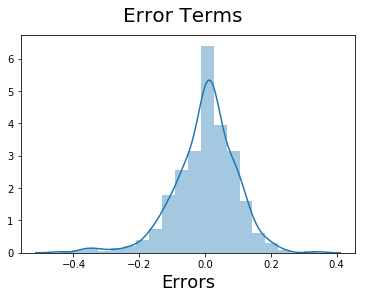

In [563]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 
plt.show()

From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid

#### No Multicollinearity between the predictor variables

In [565]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2                            temp  4.47
1                      workingday  4.43
0                              yr  2.01
7                weekday_Saturday  1.71
3                   season_spring  1.69
9        weathersit_Mist + Cloudy  1.52
4                   season_winter  1.41
5                      mnth_March  1.20
6                  mnth_September  1.15
8  weathersit_Light Snow and Rain  1.06

From the VIF calculation we could find that there is no multicollinearity existing between the predictor variables, as all the values are within permissible range of below 5.

#### MAKING PREDICTION USING FINAL MODEL

- Now that we have fitted the model and checked the assumptions, it's time to go ahead and make predictions using the final model (lr6)

In [567]:
num_vars = ['temp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [568]:
df_test.head()

yr  holiday  workingday      temp       hum  windspeed       cnt  \
22    0        0           0  0.046591  0.453529   0.462217  0.110907   
468   1        0           0  0.543115  0.522511   0.347424  0.855729   
553   1        0           0  0.951196  0.596104   0.212829  0.534975   
504   1        0           0  0.699909  0.551083   0.478229  0.817648   
353   0        0           1  0.407087  0.618615   0.080770  0.428900   

     season_spring  season_summer  season_winter            ...             \
22               1              0              0            ...              
468              0              1              0            ...              
553              0              0              0            ...              
504              0              1              0            ...              
353              0              0              1            ...              

     mnth_October  mnth_September  weekday_Monday  weekday_Saturday  \
22              0               0               0                 0   
468             0               0               0                 1   
553             0               0               0                 0   
504             0               0               0                 0   
353             0               0               0                 0   

     weekday_Sunday  weekday_Thursday  weekday_Tuesday  weekday_Wednesday  \
22                1                 0                0                  0   
468               0                 0                0                  0   
553               1                 0                0                  0   
504               1                 0                0                  0   
353               0                 0                1                  0   

     weathersit_Light Snow and Rain  weathersit_Mist + Cloudy  
22                                0                         0  
468                               0                         0  
553                               0                         0  
504                               0                         0  
353                               0                         1  

[5 rows x 29 columns]

In [569]:
df_test.describe()

yr     holiday  workingday        temp         hum   windspeed  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.493151    0.041096    0.684932    0.551225    0.662567    0.346706   
std      0.501098    0.198967    0.465607    0.229463    0.143562    0.159553   
min      0.000000    0.000000    0.000000    0.046591    0.301299    0.073090   
25%      0.000000    0.000000    0.000000    0.356479    0.553031    0.232689   
50%      0.000000    0.000000    1.000000    0.557653    0.662338    0.328208   
75%      1.000000    0.000000    1.000000    0.751309    0.762338    0.435708   
max      1.000000    1.000000    1.000000    0.984424    1.010390    0.824380   

              cnt  season_spring  season_summer  season_winter  \
count  219.000000     219.000000     219.000000     219.000000   
mean     0.518889       0.237443       0.264840       0.251142   
std      0.219953       0.426491       0.442259       0.434663   
min      0.055683       0.000000       0.000000       0.000000   
25%      0.364703       0.000000       0.000000       0.000000   
50%      0.525771       0.000000       0.000000       0.000000   
75%      0.676887       0.000000       1.000000       0.500000   
max      0.963300       1.000000       1.000000       1.000000   

                 ...             mnth_October  mnth_September  weekday_Monday  \
count            ...               219.000000      219.000000      219.000000   
mean             ...                 0.086758        0.082192        0.155251   
std              ...                 0.282125        0.275286        0.362974   
min              ...                 0.000000        0.000000        0.000000   
25%              ...                 0.000000        0.000000        0.000000   
50%              ...                 0.000000        0.000000        0.000000   
75%              ...                 0.000000        0.000000        0.000000   
max              ...                 1.000000        1.000000        1.000000   

       weekday_Saturday  weekday_Sunday  weekday_Thursday  weekday_Tuesday  \
count        219.000000      219.000000        219.000000       219.000000   
mean           0.127854        0.146119          0.173516         0.146119   
std            0.334692        0.354034          0.379560         0.354034   
min            0.000000        0.000000          0.000000         0.000000   
25%            0.000000        0.000000          0.000000         0.000000   
50%            0.000000        0.000000          0.000000         0.000000   
75%            0.000000        0.000000          0.000000         0.000000   
max            1.000000        1.000000          1.000000         1.000000   

       weekday_Wednesday  weathersit_Light Snow and Rain  \
count         219.000000                      219.000000   
mean            0.118721                        0.036530   
std             0.324202                        0.188034   
min             0.000000                        0.000000   
25%             0.000000                        0.000000   
50%             0.000000                        0.000000   
75%             0.000000                        0.000000   
max             1.000000                        1.000000   

       weathersit_Mist + Cloudy  
count                219.000000  
mean                   0.324201  
std                    0.469148  
min                    0.000000  
25%                    0.000000  
50%                    0.000000  
75%                    1.000000  
max                    1.000000  

[8 rows x 29 columns]

In [570]:
#### Dividing into x_test and y_test

y_test = df_test.pop('cnt')
X_test = df_test

X_test.info()



# y_test = df_test.pop('cnt')
# X_test = df_test

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 28 columns):
yr                                219 non-null int64
holiday                           219 non-null int64
workingday                        219 non-null int64
temp                              219 non-null float64
hum                               219 non-null float64
windspeed                         219 non-null float64
season_spring                     219 non-null uint8
season_summer                     219 non-null uint8
season_winter                     219 non-null uint8
mnth_August                       219 non-null uint8
mnth_December                     219 non-null uint8
mnth_February                     219 non-null uint8
mnth_January                      219 non-null uint8
mnth_July                         219 non-null uint8
mnth_June                         219 non-null uint8
mnth_March                        219 non-null uint8
mnth_May                          219 no

In [571]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns

X_test=X_test[col1]

# Adding constant variable to test dataframe
X_test_lm6 = sm.add_constant(X_test)

X_test_lm6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 11 columns):
const                             219 non-null float64
yr                                219 non-null int64
workingday                        219 non-null int64
temp                              219 non-null float64
season_spring                     219 non-null uint8
season_winter                     219 non-null uint8
mnth_March                        219 non-null uint8
mnth_September                    219 non-null uint8
weekday_Saturday                  219 non-null uint8
weathersit_Light Snow and Rain    219 non-null uint8
weathersit_Mist + Cloudy          219 non-null uint8
dtypes: float64(2), int64(2), uint8(7)
memory usage: 10.1 KB


In [572]:
# Making predictions using the final model (lr6)

y_pred = lr6.predict(X_test_lm6)

### Model Evaluation

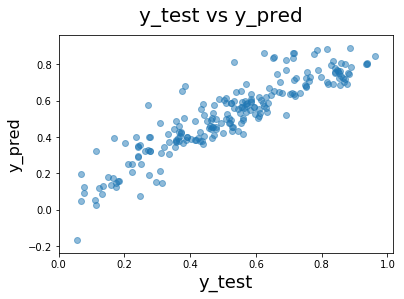

In [573]:
fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)         
plt.xlabel('y_test', fontsize = 18)                     
plt.ylabel('y_pred', fontsize = 16)      
plt.show()

### R-Squared Value for Test

In [574]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.82130508400908964

### Adjusted R-Squared Value for TEST

In [575]:
r2=0.8203092200749708

In [576]:
X_test.shape

(219, 10)

In [577]:
# n is number of rows in X

n = X_test.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.8116702402708829

### Final Result Comparision between train and test

### Train (From Model 6 - lr6)

- R-Squared - 0.818
- Adjusted R-Squared - 0.814

### Test

- R-Squared - 0.8213
- Adjusted R-Squared - 0.8116 

This seems to be a really good model that can very well 'Generalize' various datasets. -

### Final Report

As per our final Model, the top 3 predictor variables that influences the bike booking are: 
- #### Temperature (temp)
    - A coefficient value of ‘0.446388’ indicated that a unit increase in temp variable increases the bike hire numbers by 0.446388 units. 

- #### weathersit_Light Snow and Rain
    - A coefficient value of ‘-0.333724’ indicated that, w.r.t Weathersit1, a unit increase in Weathersit3 variable decreases the bike hire numbers by 0.333724 units. 

- #### Year (yr) 
    - A coefficient value of ‘0.229635’ indicated that a unit increase in yr variable increases the bike hire numbers by 0.229635 units. 